# 6.5 Machine Learning Clustering


### Contents:

#### 1. Importing libraries 
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\kaydo\OneDrive\Desktop\final'

In [4]:
# import housesales.csv

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'housesales.csv'),index_col = False)

In [5]:
df.shape

(21436, 16)

In [6]:
df.head(10)

id      date    price  bedrooms  bathrooms  sqft_lot  floors  \
0  2524049179  20140826  2000000         3       2.75     44867     1.0   
1  7922800400  20140827   951000         5       3.25     14342     2.0   
2  8096000060  20150413   655000         2       1.75     15798     2.0   
3  2025069065  20140929  2400000         4       2.50      8354     1.0   
4  2123039032  20141027   369900         1       0.75     10079     1.0   
5  3225069065  20140624  3075000         4       5.00     18641     1.0   
6  1860600135  20140502  2384000         5       2.50      9050     2.0   
7  1560930070  20140911   840000         4       3.50     40139     1.0   
8   622049114  20150218  2125000         3       2.50     24069     2.0   
9  2998800125  20140701   730000         2       2.25      4920     1.5   

   waterfront  view  condition  sqft_basement  yr_built  yr_renovated  \
0           0     4          3            720      1968             0   
1           0     4          4              0      1968             0   
2           1     4          3            220      1915          1978   
3           1     4          3           1820      2000             0   
4           1     4          5              0      1936             0   
5           1     4          3           1950      2002             0   
6           0     4          5            280      1921             0   
7           0     4          4              0      1986             0   
8           1     4          4              0      1976             0   
9           0     4          4            600      1941             0   

   zipcode      lat     long  
0    98040  47.5316 -122.233  
1    98008  47.5880 -122.116  
2    98166  47.4497 -122.375  
3    98074  47.6338 -122.072  
4    98070  47.4683 -122.438  
5    98074  47.6053 -122.077  
6    98119  47.6345 -122.367  
7    98038  47.4010 -122.026  
8    98166  47.4169 -122.348  
9    98116  47.5730 -122.409

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [10]:
#Create a subset containing only continuous numeric variables
dfc= df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated']]


## 2. The Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.773696533124328e+23,
 -3.5785958648493898e+22,
 -1.7605720483445644e+22,
 -9.80672986600136e+21,
 -6.46454725544892e+21,
 -3.884698062440579e+21,
 -2.9452305604672377e+21,
 -2.2099950959861288e+21,
 -1.7572803931164194e+21]

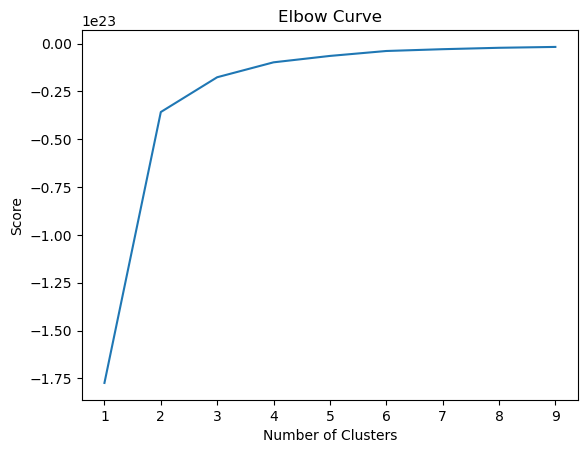

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Interpretation: There is a large jump from two to three on the x-axis and then the curve straightens out. I will proceed with 3 clusters.

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(dfc)

KMeans(n_clusters=3)

In [17]:
dfc['clusters'] = kmeans.fit_predict(df)

C:\Users\kaydo\AppData\Local\Temp\ipykernel_25596\20889692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['clusters'] = kmeans.fit_predict(df)


In [18]:
dfc.head()

price  bedrooms  bathrooms  sqft_lot  floors  sqft_basement  yr_built  \
0  2000000         3       2.75     44867     1.0            720      1968   
1   951000         5       3.25     14342     2.0              0      1968   
2   655000         2       1.75     15798     2.0            220      1915   
3  2400000         4       2.50      8354     1.0           1820      2000   
4   369900         1       0.75     10079     1.0              0      1936   

   yr_renovated  clusters  
0             0         1  
1             0         2  
2          1978         2  
3             0         1  
4             0         1

In [33]:
dfc['clusters'].value_counts()

2    7714
1    6950
0    6772
Name: clusters, dtype: int64

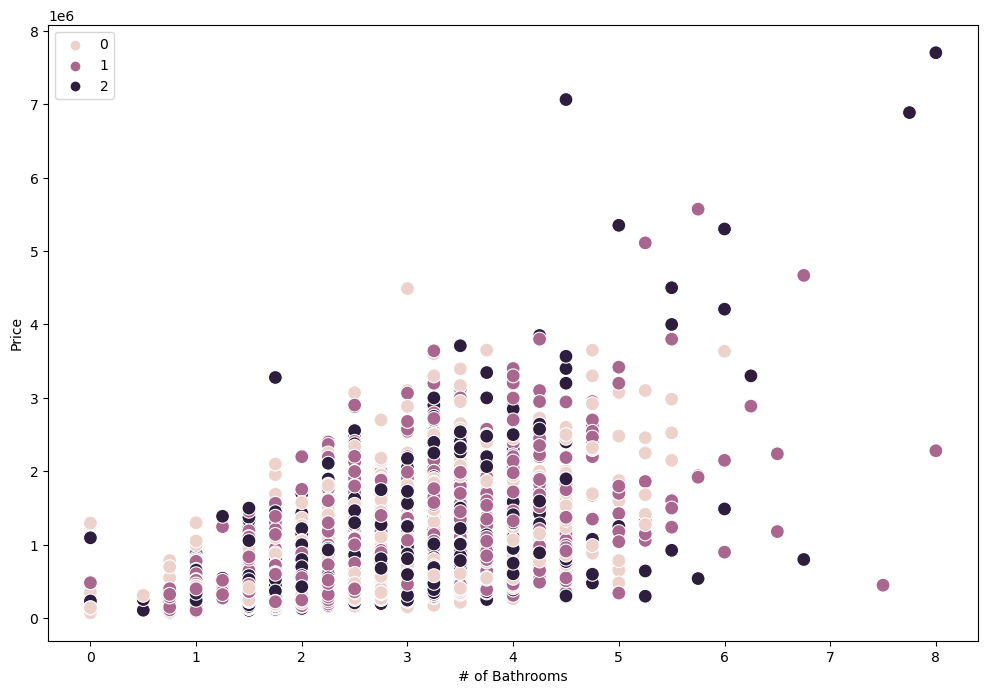

In [22]:
# Plot the clusters for the "Price" and "Bathrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['bathrooms'], y=dfc['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('# of Bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Interpretation:Data continues to show an upward trend but clusters are not appearant. Clusters one and zero are more prevalant when there are 2 or less bathrooms. Cluster 2 appears the most between 3-6 bathrooms. This further disproves our earlier hypothesis of "If there are more bathrooms, the price will go up".

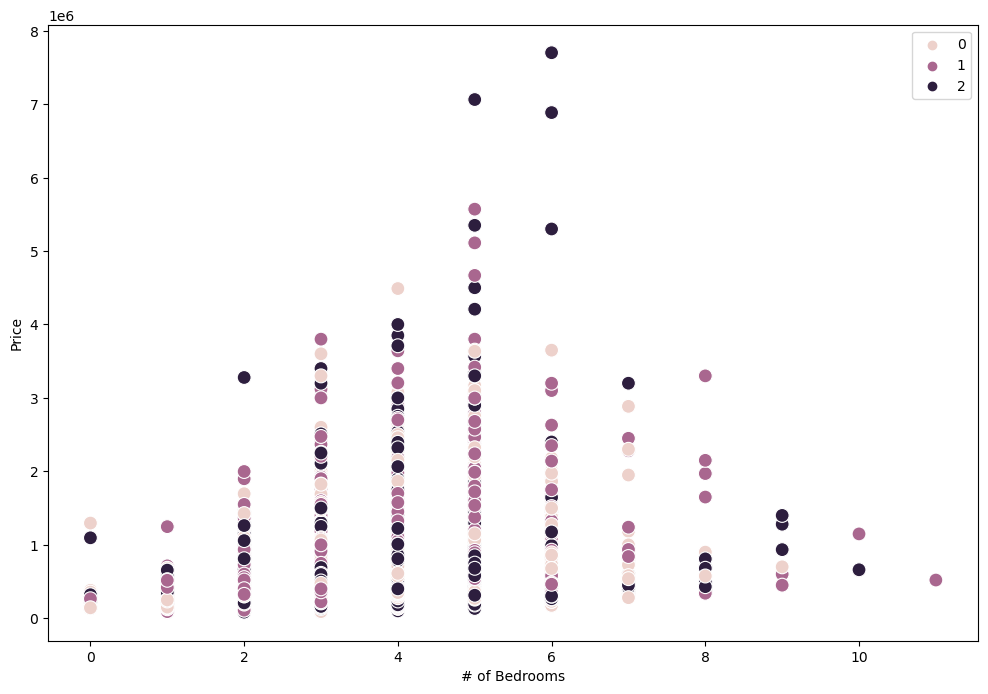

In [23]:
# Plot the clusters for the "Bedrooms" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['bedrooms'], y=dfc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('# of Bedrooms') 
plt.ylabel('Price') 
plt.show()

### Interpretation: Cluster zero drops off after 7 bedrooms. Cluster groups mainly fall in between 4 and six bedrooms with cluster 2 being more dominant in this area.  After 7 bedrooms mostly clusters 1 and 2 remain. 

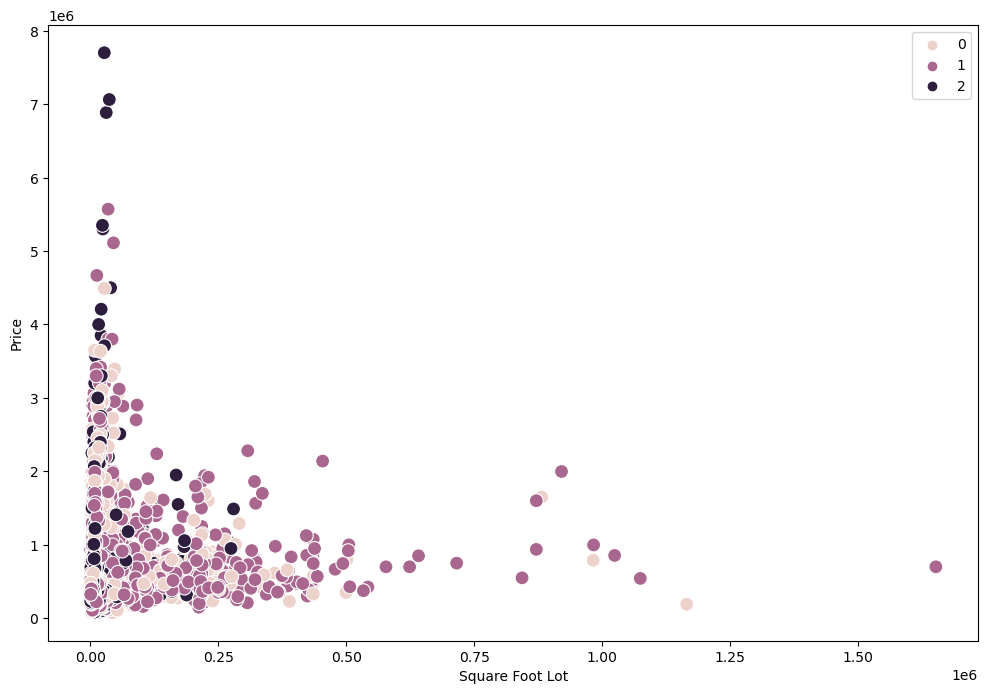

In [24]:
# Plot the clusters for the "Sqft_lot" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['sqft_lot'], y=dfc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Square Foot Lot') 
plt.ylabel('Price') 
plt.show()

### Interpretation: Clusters 0 and 1 range from 0 -.5 in sqft while cluster 2 suprisingly goes much higher in price with smaller amounts of sqft. This challenges my assumption that when you buy more land, the price will go up. This would actually disprove that notion. I interpret this as meaning that houses with smaller sqft are more likely "city" homes and cost more. 

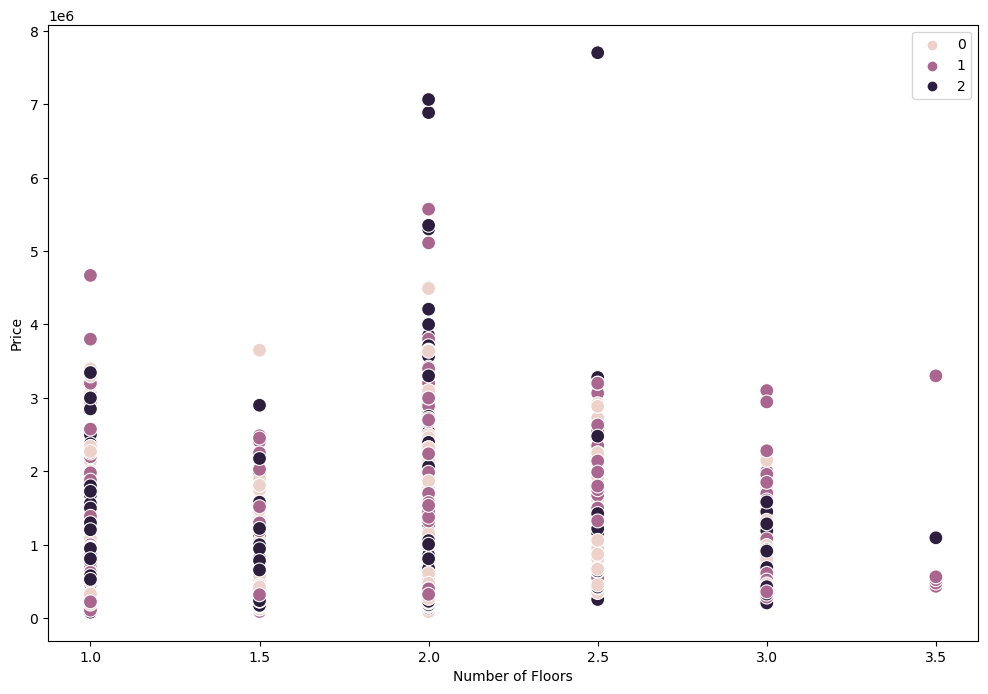

In [25]:
# Plot the clusters for the "floors" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['floors'], y=dfc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Floors') 
plt.ylabel('Price') 
plt.show()

### Interpretation: Clusters 0-2 are pretty widespread across the number of floors. There does not seem to be a correlation or linear dependance within these variables.

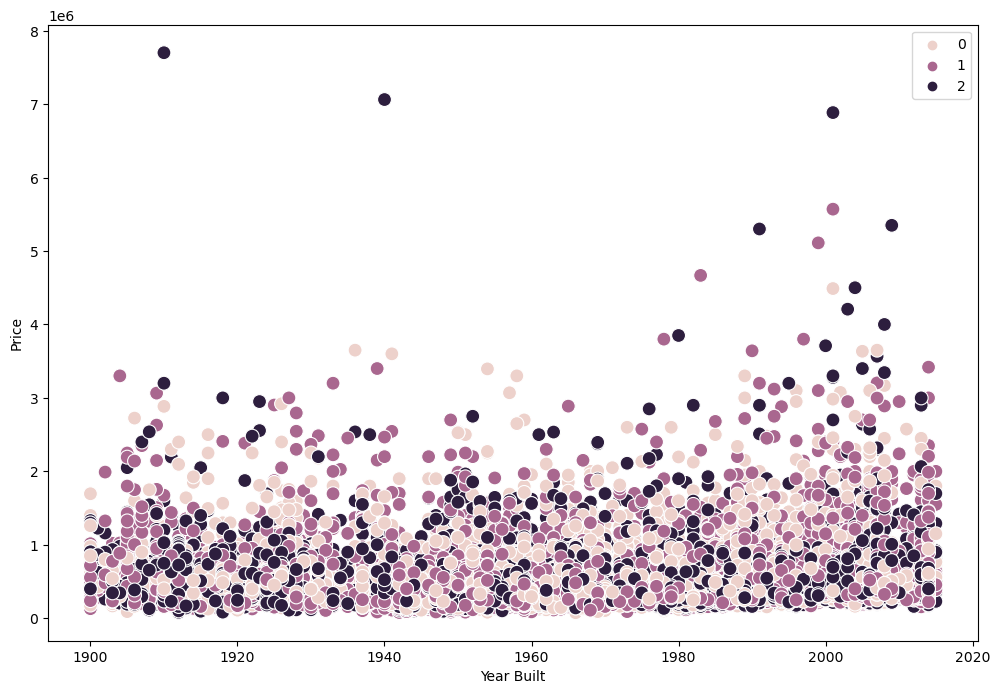

In [26]:
# Plot the clusters for the "yr_built" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yr_built'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Price') 
plt.show()

### Interpretation: Clusters 0-2 are pretty widespread across year built. There does not seem to be a correlation or linear dependance within these variables.

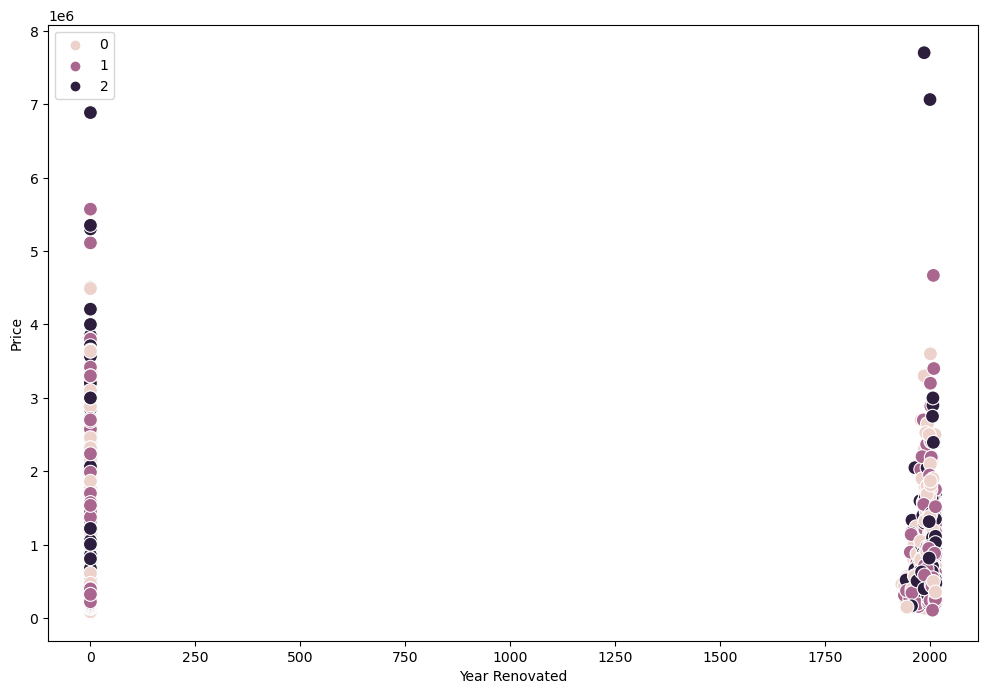

In [37]:
# Plot the clusters for the "yr_renovated" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['yr_renovated'], y=dfc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Renovated') 
plt.ylabel('Price') 
plt.show()

### Interpretation: Clusters are appearant in renovated years of 2000's and for houses that have not been renovated. We can eliminate the Year Renovated as a varibale tht impacts the price very much.


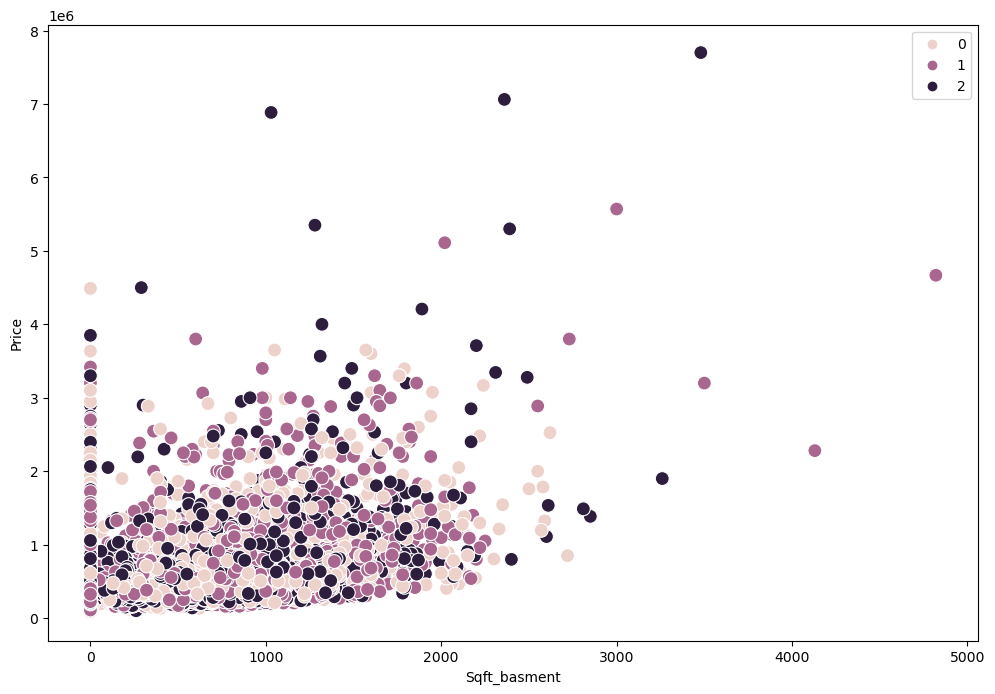

In [30]:
# Plot the clusters for the "sqft_basement" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfc['sqft_basement'], y=dfc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sqft_basment') 
plt.ylabel('Price') 
plt.show()

In [34]:
dfc.loc[dfc['clusters'] == 2, 'cluster'] = 'dark purple'
dfc.loc[dfc['clusters'] == 1, 'cluster'] = 'purple'
dfc.loc[dfc['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\kaydo\AppData\Local\Temp\ipykernel_25596\2442860871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.loc[dfc['clusters'] == 2, 'cluster'] = 'dark purple'


In [35]:
dfc.groupby('cluster').agg({'bathrooms':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'sqft_lot':['mean', 'median'],
                           'yr_built':['mean', 'median'],
                           'yr_renovated':['mean', 'median'],
                            'floors':['mean', 'median'],
                            'sqft_basement':['mean', 'median'],
                          'price':['mean', 'median']})

bathrooms         bedrooms             sqft_lot          \
                 mean median      mean median          mean  median   
cluster                                                               
dark purple  2.118616   2.25  3.360643    3.0   9267.761473  7202.0   
pink         2.103256   2.25  3.369019    3.0  13911.819403  7600.0   
purple       2.129676   2.25  3.381871    3.0  22841.033094  8137.0   

                yr_built         yr_renovated           floors         \
                    mean  median         mean median      mean median   
cluster                                                                 
dark purple  1972.048224  1977.0    77.884625    0.0  1.510371   1.50   
pink         1970.415978  1973.0    82.516539    0.0  1.487965   1.00   
purple       1970.709209  1974.0    94.484029    0.0  1.488489   1.25   

            sqft_basement                 price            
                     mean median           mean    median  
cluster                                                    
dark purple    279.388774    0.0  528821.904848  455000.0  
pink           304.113260    0.0  539620.073833  450000.0  
purple         293.406475    0.0  554409.566331  449999.5

### Future steps of analysis: Utilizing the cluster visuals has allowed me to eliminate variables that have a correlation with price. Eliminated variables would be bathrooms, yr_built, yr_renovated, floors, sqft_basment. The one variable/cluster that I found intersting would be the sqft_lot because it challenged the notion of more sqft= higher price. By highlighting this variable and eliminating the others, geographical location seems to bear the most weight for price. 